# Week 4, Mon, 4/21

In [1]:
import numpy as np
import matplotlib.pyplot as plt
x = np.array([0,1,2,3])
y = np.array([0,2,0,6])

In [2]:
# do linear regression class

class myLinearRegression:
    '''
    The single-variable linear regression estimator.
    This serves as an example of the regression models from sklearn, with methods fit, predict, and score.
    '''
    def __init__(self):
        '''
        '''
        self.w = None
        self.b = None
    
    def fit(self, x, y):
        # covariance matrix, 
        # bias = True makes the factor 1/N, otherwise 1/(N-1)
        # but it doesn't matter here, since the factor will be cancelled out in the calculation of w
        
        cov_mat = np.cov(x, y, bias=True)
        # cov_mat[0, 1] is the covariance of x and y, and cov_mat[0, 0] is the variance of x

        self.w = cov_mat[0, 1] / cov_mat[0, 0]
        self.b = np.mean(y) - self.w * np.mean(x)

        # :.3f means 3 decimal places
        print(f'w = {self.w:.3f}, b = {self.b:.3f}')

    def predict(self, x):
        '''
        Predict the output values for the input value x, based on trained parameters

        '''
        ypred = self.w * x + self.b
        return ypred

    def score(self, x, y):
        '''
        Calculate the R^2 score of the model
        '''
        mse =  np.mean((y - self.predict(x))**2)
        var = np.mean((y - np.mean(y))**2)
        Rsquare = 1 - mse / var
        return Rsquare

In [3]:
lr = myLinearRegression()
lr.fit(x, y)
print(f'score = {lr.score(x, y):.3f}')

w = 1.600, b = -0.400
score = 0.533


Use the following command in a stand-alone code cell to install scikit-learn

`%conda install scikit-learn`

or

`%pip install scikit-learn`

In [4]:
from sklearn.linear_model import LinearRegression

In [5]:
reg = LinearRegression()

In [8]:
x

array([0, 1, 2, 3])

In [7]:
x.reshape(-1,1)

array([[0],
       [1],
       [2],
       [3]])

In [9]:
reg.fit(x.reshape(-1,1), y)

LinearRegression()

In [10]:
reg.coef_

array([1.6])

In [11]:
reg.intercept_

-0.40000000000000036

In [13]:
score = reg.score(x.reshape(-1,1),y)
score

0.5333333333333334

In [15]:
x_center = x - np.mean(x)
reg.fit(x_center.reshape(-1,1),y)
print(f'w = {reg.coef_[0]:.3f}, b = {reg.intercept_:.3f}')

w = 1.600, b = 2.000


score = 0.992


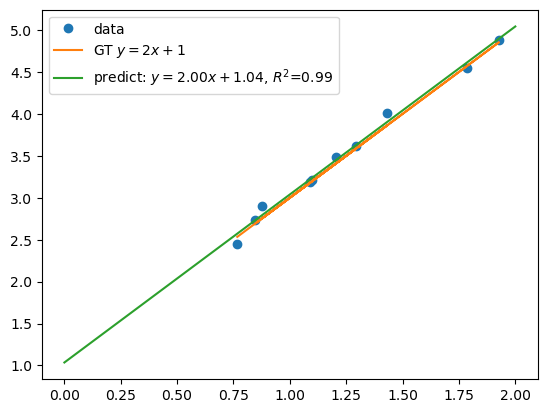

In [18]:
# Generate synthetic data

np.random.seed(0) # for reproducibility

a = 0
b = 2
N = 10

x = np.random.uniform(a,b,(N,1))
y = 2 * x + 1 + np.random.normal(0, 0.1, (N, 1))
y_gt = 2 * x + 1

# Fit the model
lm = LinearRegression()
lm.fit(x, y)
score = lm.score(x, y)


# plot data
plt.plot(x, y, 'o', label='data')
# plot ground truth

plt.plot(x, y_gt, label=f'GT $y=2x+1$')

# plot the linear regression model
xs = np.linspace(a, b, 100).reshape(-1, 1)
plt.plot(xs, lm.predict(xs), label=f'predict: $y={lm.coef_.item():.2f}x+{lm.intercept_.item():.2f}$, $R^2$={score:.2f}')
plt.legend()

print(f'score = {score:.3f}')



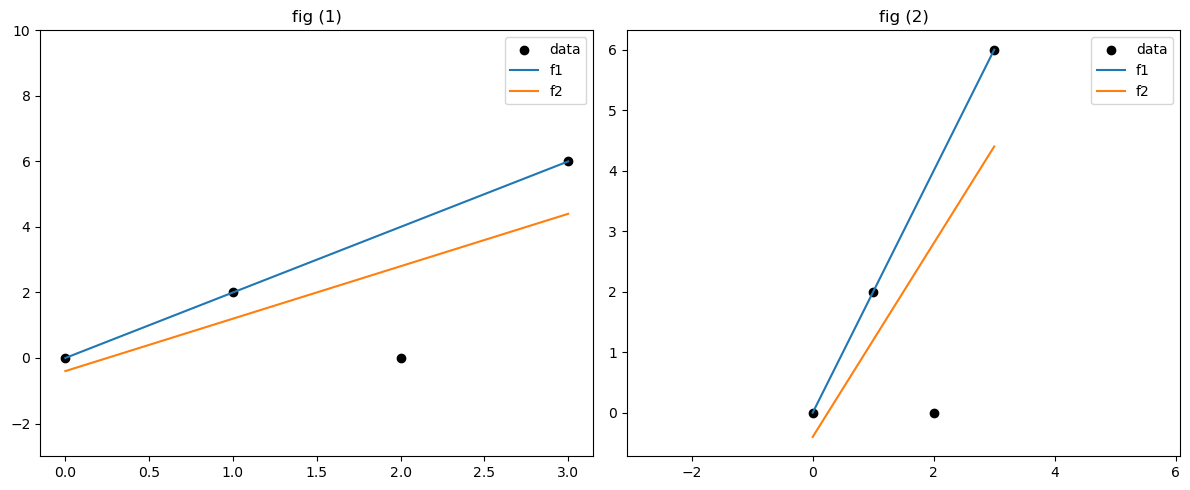

In [19]:
import numpy as np
x = np.array([0,1,2,3])
y = np.array([0,2,0,6])

import pandas as pd
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt

df = pd.DataFrame({
    "x":x,
    "y":y},
)

f1 = lambda x: 2*x
f2 = lambda x: 1.6*x - 0.4

df["f1"] = f1(df["x"])
df["f2"] = f2(df["x"])

fig, axs = plt.subplots(1, 2, figsize=(12, 5))

# Plot 1: custom y-limits
axs[0].scatter(df["x"], df["y"], color='black', label='data')
axs[0].plot(df["x"], df["f1"], label='f1')
axs[0].plot(df["x"], df["f2"], label='f2')
axs[0].set_ylim(-3, 10)
axs[0].legend()
axs[0].set_title('fig (1)')

# Plot 2: equal axis
axs[1].scatter(df["x"], df["y"], color='black', label='data')
axs[1].plot(df["x"], df["f1"], label='f1')
axs[1].plot(df["x"], df["f2"], label='f2')
axs[1].axis('equal')
axs[1].legend()
axs[1].set_title('fig (2)')

plt.tight_layout()
plt.show()

# poll: which is better fit

(-0.15000000000000002, 3.15, -0.7200000000000001, 6.32)

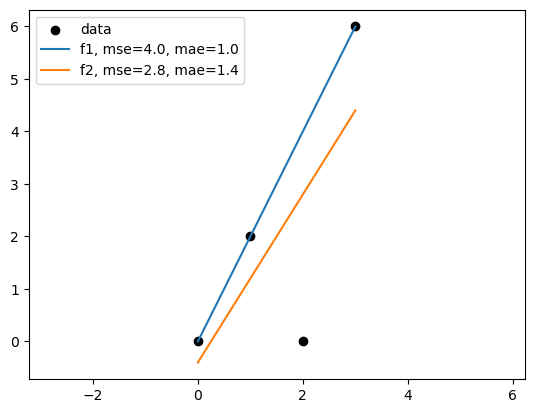

In [20]:
f1_mse = mean_squared_error(df["y"], df["f1"])
f2_mse = mean_squared_error(df["y"], df["f2"])
f1_mae = mean_absolute_error(df["y"], df["f1"])
f2_mae = mean_absolute_error(df["y"], df["f2"])

# plot the data
plt.scatter(df["x"], df["y"], color='black')
plt.plot(df["x"], df["f1"], label='f1')
plt.plot(df["x"], df["f2"], label='f2')
plt.legend(['data',f'f1, mse={f1_mse:.1f}, mae={f1_mae:.1f}', f'f2, mse={f2_mse:.1f}, mae={f2_mae:.1f}'])

plt.axis('equal')


## What is a "good" fit?

It depends on the metric we use to evaluate the model.

The best model in terms of MSE(mean squared error) might not be the best model in terms of MAE(mean absolute error).

$$\text{MAE} = \frac{1}{N}\sum_{i=1}^{N}|y_i-\hat{y}^{(i)}|$$

Linear regression based on MSE can seem sensitive to outliers than MAE. But minimize MAE is much more challenging.


For regression methods that are designed to handle outliers, see [Outlier-robust regressors](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.linear_model)

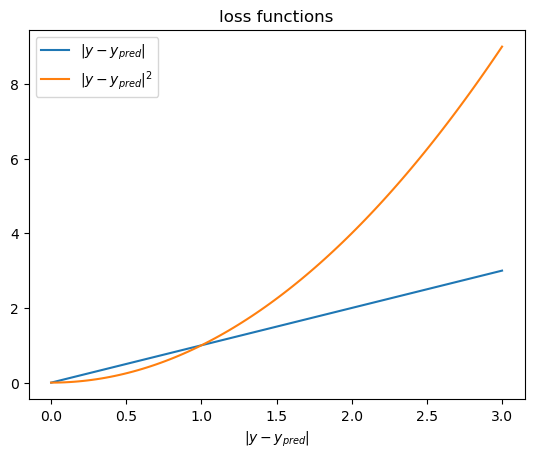

In [21]:
x = np.linspace(0, 3, 100)

y1 = x
y2 = x**2

fig, ax = plt.subplots()

ax.plot(x, y1, label='$|y-y_{pred}|$')
ax.plot(x, y2, label='$|y-y_{pred}|^2$')
ax.set_title('loss functions')
ax.set_xlabel('$|y-y_{pred}|$')
# ax.set_ylabel('loss')
ax.legend()
# equal axis
# ax.axis('equal')
# ax.set_xlim(0, 3)
# ax.set_aspect('equal')
# ax.set_ylim(0, 9)


## **Problem**
Given the data $(x_i,y_i), i= 1,2,..., N$, this time with $y_i\in \mathbb{R}$ and $x_i\in\mathbb{R}^{p}$, we fit the multi-variable linear function

$$y_i\approx\mathbf{f}(x)=\beta_{0}+\beta_{1}x_{i1}+..+\beta_{p}x_{ip} = \mathbf{x}_i^T\beta,$$  

$$\mathbf{x}_i=(1,x_{i1},..,x_{ip})\in\mathbb{R}^{p+1},\beta = (\beta_{0},\beta_{1},..,\beta_{p})\in\mathbb{R}^{p+1}.$$

Here $\beta$'s are regression coefficients, and $\beta_{0}$ is the intercept. 

The data can be written as

$$Y=
 \begin{bmatrix}
   y_1\\
   y_2 \\
   \cdots \\
   y_N
  \end{bmatrix} 
$$

Our prediction in matrix form is

$$
  \begin{bmatrix}
   \mathbf{f}(\mathbf{x}_1)\\
   \mathbf{f}(\mathbf{x}_2)\\
   \cdots \\
   \mathbf{f}(\mathbf{x}_N)
  \end{bmatrix} 
  =
  \begin{bmatrix}
   1& x_{11}& \cdots & x_{1p}\\
   1& x_{21}& \cdots & x_{2p}\\
   \cdots \\
   1& x_{N1}& \cdots & x_{Np}  
   \end{bmatrix} 
    \begin{bmatrix}
    \beta_{0}\\
    \beta_{1}\\
    \cdots \\
    \beta_{p}
  \end{bmatrix}
= \mathbf{X}\beta,
$$

Here $\mathbf{X}$ is a $N\times (p+1)$ matrix, and is called the data matrix or design matrix.


### Loss Function and Optimization

With the dataset, define the loss function $L(\beta)$ of parameters $\beta$, which is the **Residual Sum of Squares** (RSS). We could also divide it by $N$ to get the **Mean Squared Error** (MSE). This does not change the optimal solution

$$L(\beta)= \sum_{i=1}^N(y_i-\mathbf{x}_i^T\beta)^{2},$$

In matrix form, it can be written as 


$$ L(\beta) = ||Y-\mathbf{X} \beta||^{2} $$

We arrive at the optimization problem:

$$\min_{\beta} L(\beta).$$

To solve the critical points, we have $\nabla L(\beta)=0$.

In Matrix form, it can be expressed as

$$\mathbf{X}^{T}\mathbf{X}\beta=\mathbf{X}^{T}Y,$$

also called the **normal equation** of linear regression. 

The optimal parameter is given by
$\hat{\beta}= (\mathbf{X}^{T}\mathbf{X})^{-1}\mathbf{X}^{T}Y$.

The prediction of the model is $\hat{Y}=\mathbf{X}\hat{\beta}$.

To evaluate the model, we can use the **coefficient of determination** $R^{2}$, RSS or MSE.


<!-- **[Geometrical Interpretation](https://en.wikipedia.org/wiki/Ordinary_least_squares)**

From the normal equation,

$$\mathbf{X}^{T}(\mathbf{Y}-\mathbf{X} \hat{\beta})=0$$

We are requiring that the residual $Y-\mathbf{X} \hat{\beta}$ is orthogonal to the column space of $\mathbf{X}$. -->

**Exercise**: Check that when $p=1$, the solution is equivalent to the single-variable regression. 